In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [3]:
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [4]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [6]:
# Convert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [7]:
 # Convert the following numerical labels from interger to float
float_array = X_train[["age_of_respondent", "year"]].values.astype(float)
    
# categorical features to be onverted to One Hot Encoding
categ = ["marital_status",
             "education_level",
             "job_type",
             "country"]
    
# One Hot Encoding conversion
X_train = pd.get_dummies(X_train, prefix_sep="_", columns=categ)
    
# Label Encoder conversion
X_train["location_type"] = le.fit_transform(X_train["location_type"])
X_train["cellphone_access"] = le.fit_transform(X_train["cellphone_access"])
X_train["gender_of_respondent"] = le.fit_transform(X_train["gender_of_respondent"])
    
# drop uniquid column
X_train = X_train.drop(["uniqueid", "household_size", "relationship_with_head"], axis=1)
    
X_train.head()

,year,location_type,cellphone_access,age_of_respondent,gender_of_respondent,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,0,1,24,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2018,0,0,70,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2018,1,1,26,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2018,0,1,34,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,1,0,26,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [8]:
X_train.corr()

,year,location_type,cellphone_access,age_of_respondent,gender_of_respondent,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
year,1.000000,0.214621,-0.066505,-0.019330,0.000317,0.017146,0.022291,-0.005174,0.022470,-0.041787,...,-0.006426,-0.156028,0.081631,0.101870,0.095070,0.180932,0.712544,-0.885158,0.017770,0.378473
location_type,0.214621,1.000000,-0.085238,-0.047373,0.012924,0.023893,0.008875,-0.236190,0.268959,-0.052119,...,-0.002052,-0.071098,0.045064,0.011032,0.054247,0.296278,0.031225,-0.389062,0.431626,-0.069356
cellphone_access,-0.066505,-0.085238,1.000000,-0.103611,0.102370,-0.028880,0.005608,0.158290,-0.065682,-0.124270,...,-0.058395,-0.008392,-0.103875,-0.006649,-0.083128,-0.056012,0.062789,0.154415,-0.206499,-0.032318
age_of_respondent,-0.019330,-0.047373,-0.103611,1.000000,0.012745,-0.120030,0.005242,0.053767,-0.296633,0.462524,...,0.171390,-0.089447,-0.061105,-0.014614,-0.057238,0.000097,0.028948,0.022690,-0.012334,-0.063400
gender_of_respondent,0.000317,0.012924,0.102370,0.012745,1.000000,0.004768,0.017434,0.056201,0.086199,-0.220843,...,-0.023990,0.052309,-0.073582,-0.011521,-0.120942,0.037074,0.019273,-0.009150,0.019064,-0.044125
marital_status_Divorced/Seperated,0.017146,0.023893,-0.028880,-0.120030,0.004768,1.000000,-0.005738,-0.285380,-0.222979,-0.112214,...,-0.015876,0.035217,0.092733,-0.013111,-0.008232,0.014432,-0.062172,-0.092080,0.165557,-0.009676
marital_status_Dont know,0.022291,0.008875,0.005608,0.005242,0.017434,-0.005738,1.000000,-0.016919,-0.013219,-0.006653,...,-0.001900,0.005937,-0.003052,-0.004046,0.001047,-0.000978,0.031283,-0.014175,-0.011542,-0.005776
marital_status_Married/Living together,-0.005174,-0.236190,0.158290,0.053767,0.056201,-0.285380,-0.016919,1.000000,-0.657426,-0.330849,...,-0.056816,0.034374,-0.076028,0.033234,-0.123928,-0.137685,0.146348,0.212768,-0.447459,0.120579
marital_status_Single/Never Married,0.022470,0.268959,-0.065682,-0.296633,0.086199,-0.222979,-0.013219,-0.657426,1.000000,-0.258505,...,-0.020981,-0.029386,0.026880,-0.032389,0.106828,0.177932,-0.113112,-0.203893,0.395795,-0.105139
marital_status_Widowed,-0.041787,-0.052119,-0.124270,0.462524,-0.220843,-0.112214,-0.006653,-0.330849,-0.258505,1.000000,...,0.134023,-0.041697,-0.003455,0.008066,0.042197,-0.061843,-0.007162,0.053055,-0.035267,-0.023285


In [9]:
# scale our data into range of 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)

In [10]:
X_train

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [11]:
X_train.shape

(23524, 30)

In [12]:
y_train

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32

In [13]:
y_train.shape

(23524,)

In [14]:
import sklearn.model_selection

In [15]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(X_train, y_train, stratify = y_train, 
                                                  test_size = 0.3, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
#creating a RandomForest classifier
classifier = RandomForestClassifier(n_jobs = 2, random_state = 0)

# Train the classifier
classifier.fit(X_train,y_train)


RandomForestClassifier(n_jobs=2, random_state=0)

In [17]:
y_pred = classifier.predict(X_Val)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6064
           1       0.91      0.73      0.81       994

    accuracy                           0.95      7058
   macro avg       0.93      0.86      0.89      7058
weighted avg       0.95      0.95      0.95      7058



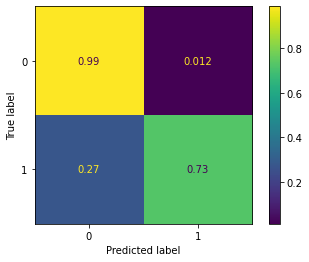

In [19]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(classifier,X_Val, y_val,normalize='true')

In [20]:
test.head(3)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent


In [21]:
 # Convert the following numerical labels from interger to float
float_array = test[["age_of_respondent", "year"]].values.astype(float)
    
# categorical features to be onverted to One Hot Encoding
categ = ["marital_status",
             "education_level",
             "job_type",
             "country"]
    
# One Hot Encoding conversion
test = pd.get_dummies(test, prefix_sep="_", columns=categ)
    
# Label Encoder conversion
test["location_type"] = le.fit_transform(test["location_type"])
test["cellphone_access"] = le.fit_transform(test["cellphone_access"])
test["gender_of_respondent"] = le.fit_transform(test["gender_of_respondent"])
    
# drop uniquid column
test = test.drop(["uniqueid", "household_size","relationship_with_head"], axis=1)
    
test.head()

,year,location_type,cellphone_access,age_of_respondent,gender_of_respondent,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,1,1,30,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2018,1,1,51,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2018,0,0,77,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,2018,0,0,39,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,2018,1,0,16,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [22]:
# scale our data into range of 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
test = scaler.fit_transform(test)

In [23]:
# Get the predicted result for the test Data
predictions = classifier.predict(test)

In [24]:
test2 = pd.read_csv('test.csv')

In [25]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test2["uniqueid"] + " x " + test2["country"],
                           "bank_account": predictions})

In [26]:
submission.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [27]:
submission.to_csv('sixth_submission.csv', index = False)

In [28]:
# # Example of calculating Euclidean distance
# from math import sqrt

# # calculate the Euclidean distance between two vectors
# def euclidean_distance(row1, row2):
# 	distance = 0.0
# 	for i in range(len(row1)-1):
# 		distance += (row1[i] - row2[i])**2
# 	return sqrt(distance)

In [29]:
# # Test distance function
# dataset = train
# row0 = dataset[5]
# for row in dataset:
# 	distance = euclidean_distance(row0, row)
# 	print(distance)

In [30]:
# # Locate the most similar neighbors
# def get_neighbors(train, test_row, num_neighbors):
# 	distances = list()
# 	for train_row in train:
# 		dist = euclidean_distance(test_row, train_row)
# 		distances.append((train_row, dist))
# 	distances.sort(key=lambda tup: tup[1])
# 	neighbors = list()
# 	for i in range(num_neighbors):
# 		neighbors.append(distances[i][0])
# 	return neighbors

In [31]:
# # Example of getting neighbors for an instance
# from math import sqrt

# # calculate the Euclidean distance between two vectors
# def euclidean_distance(row1, row2):
# 	distance = 0.0
# 	for i in range(len(row1)-1):
# 		distance += (row1[i] - row2[i])**2
# 	return sqrt(distance)

# # Locate the most similar neighbors
# def get_neighbors(train, test_row, num_neighbors):
# 	distances = list()
    
# 	for train_row in train:
# 		dist = euclidean_distance(test_row, train_row)
# 		distances.append((train_row, dist))
    
# 	distances.sort(key=lambda tup: tup[1])
# 	neighbors = list()
# 	for i in range(num_neighbors):
# 		neighbors.append(distances[i][0])
# 	return neighbors

In [32]:
# # Test distance function
# dataset = train
# neighbors = get_neighbors(dataset, dataset[0], 3)
# # print("These are my distance: " distances)
# for neighbor in neighbors:
# 	print("These are my neighbors: {}".format(neighbors))

In [33]:
# # Make a classification prediction with neighbors
# def predict_classification(train, test_row, num_neighbors):
# 	neighbors = get_neighbors(train, test_row, num_neighbors)
# 	output_values = [row[-1] for row in neighbors]
# 	prediction = max(set(output_values), key=output_values.count)
# 	return prediction

In [34]:
# # Test distance function
# dataset = train
# prediction = predict_classification(dataset, dataset[0], 3)
# print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

In [35]:
# train